In [2]:
import numpy as np
import os
CurrentPath = os.getcwd()
data_1 = np.loadtxt(CurrentPath + '/2025/data_1.txt', delimiter=' ')
data_1_X = data_1.T[0];data_1_Y = data_1.T[1]; data_1_var = data_1.T[2]

In [3]:
from scipy.optimize import curve_fit
def cube(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
popt, _ = curve_fit(cube, data_1_X, data_1_Y, sigma = np.sqrt(data_1_var))
poptround = popt.round(3)

In [156]:
paramA = np.arange(poptround[0]-0.0005,poptround[0]+0.0005,0.0001)
paramB = np.arange(poptround[1]-0.0007,poptround[1]+0.0007,0.00001)
paramC = np.arange(poptround[2]-0.035,poptround[2]+0.035,0.00025)
paramD = np.arange(poptround[3]-0.6,poptround[3]+0.6,0.005)

gridA, gridB, gridC, gridD = np.meshgrid(paramA, paramB, paramC, paramD, indexing='ij')
def chisqCube(gridA, gridB, gridC, gridD, X, Y, var): # chisquare for quadratic function
    chisq = np.zeros_like(gridA)
    for i, Xval in enumerate(X):
        print(Xval, Y[i])
        Ytheory = cube(Xval, gridA, gridB, gridC, gridD)
        chisq += (Y[i] - Ytheory)**2/var[i]
    return chisq

In [181]:
arr = chisqCube(gridA, gridB, gridC,gridD, data_1_X, data_1_Y, data_1_var)


1.56043 24.56454
4.94369 80.42055
9.72725 536.55258
10.05207 594.4166
11.76586 972.43181
13.42904 1473.77631
13.92488 1651.87717
23.38125 8395.83595
28.36169 15309.03264
30.83132 19830.81539
33.20979 24955.69747
35.10465 29620.20798
37.74654 37047.96841
39.73346 43387.15583
40.36694 45551.00173
44.67005 62183.70136
48.40512 79550.28863
50.68309 91584.80386
51.70296 97344.36464
57.69332 136113.03005
65.4929 200429.08198
73.18915 281159.52394
86.5831 468675.21607
90.19017 530518.19625
92.64896 575649.5502


In [182]:

minchisq = arr.min()
bestfitind = np.unravel_index(np.argmin(arr), arr.shape)
maxLikelihood = np.exp(-minchisq/2)
def Likelihood(chisq):
    return np.exp(-chisq/2)/maxLikelihood
arrLikelihood = Likelihood(arr)


In [183]:
abSpace = np.sum(arrLikelihood, axis=(2,3))
acSpace = np.sum(arrLikelihood, axis=(1,3))
adSpace = np.sum(arrLikelihood, axis=(1,2))
bcSpace = np.sum(arrLikelihood, axis=(0,3))
bdSpace = np.sum(arrLikelihood, axis=(0,2))
cdSpace = np.sum(arrLikelihood, axis=(0,1))

In [235]:
np.arange(poptround[1]-0.0007,poptround[1]+0.0007,0.0005)

array([-2.5007, -2.5002, -2.4997])

<Figure size 800x3000 with 0 Axes>

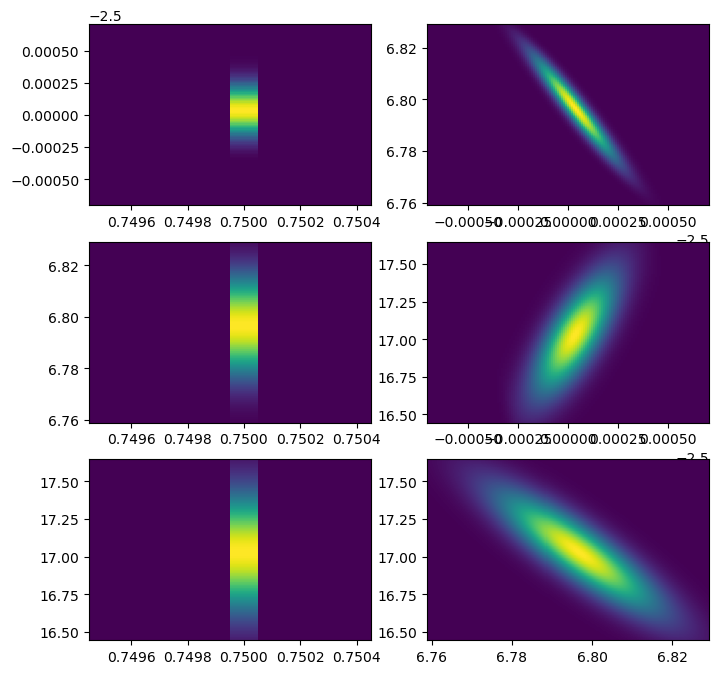

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,30))
fig, ax = plt.subplots(3,2, figsize=(8,8))
ab = ax[0,0].pcolormesh(paramA, paramB, abSpace.T, shading='auto')
ac = ax[1,0].pcolormesh(paramA, paramC, acSpace.T)
ad = ax[2,0].pcolormesh(paramA, paramD, adSpace.T)
bc = ax[0,1].pcolormesh(paramB, paramC, bcSpace.T)
#ax[0,1].set_xticks(np.arange(poptround[1]-0.0007,poptround[1]+0.0007,0.0005))
bd = ax[1,1].pcolormesh(paramB, paramD, bdSpace.T)
#ax[1,1].set_xticks(np.arange(poptround[1]-0.0007,poptround[1]+0.0007,0.0005))
cd = ax[2,1].pcolormesh(paramC, paramD, cdSpace.T)

In [200]:
bcB, bcC = np.meshgrid(paramB, paramC)
bdB, bdD = np.meshgrid(paramB, paramD)
cdC, cdD = np.meshgrid(paramC, paramD)

In [231]:
print(f'Max Likelihood function : \n {paramA[bestfitind[0]]}x**3 + {paramB[bestfitind[1]]:.4f}x**2 + {paramC[bestfitind[2]]:.4f} + {paramD[bestfitind[3]]:.4f}')
print(f'chisq value : {minchisq}')

Max Likelihood function : 
 0.75x**3 + -2.5000x**2 + 6.7963 + 17.0360
chisq value : 3.2344070132781764


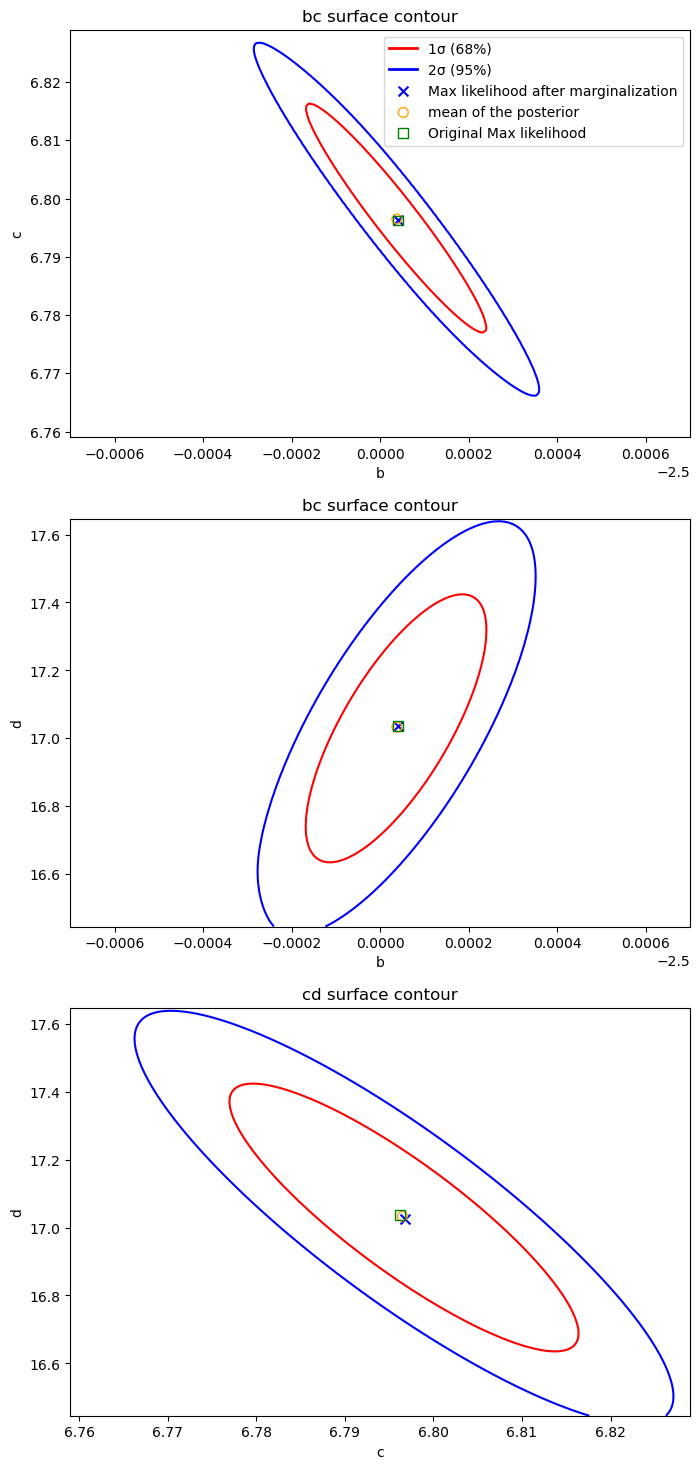

In [226]:
from matplotlib.lines import Line2D

db = paramB[1] - paramB[0]
dc = paramC[1] - paramC[0]
dd = paramD[1] - paramD[0]
delta_bc = db*dc
delta_bd = db*dd
delta_cd = dc*dd

# CD
total_prob_cd = np.sum(cdSpace * delta_cd)
CD_norm = cdSpace / total_prob_cd
CD_flat = np.sort(CD_norm.ravel())[::-1]
cdSpaceMaxind = np.unravel_index(np.argmax(CD_norm), CD_norm.shape) # maximum likelihood
cdmeanPost_C = np.sum(cdC * CD_norm.T * delta_cd) # mean of the posterior
cdmeanPost_D = np.sum(cdD * CD_norm.T * delta_cd) # mean of the posterior
CD_cumsum = np.cumsum(CD_flat * delta_cd)
sigma_1_cd = CD_flat[np.searchsorted(CD_cumsum, 0.68)]
sigma_2_cd = CD_flat[np.searchsorted(CD_cumsum, 0.95)]

# BC
total_prob_bc = np.sum(bcSpace * delta_bc)
BC_norm = bcSpace / total_prob_bc
BC_flat = np.sort(BC_norm.ravel())[::-1]
bcSpaceMaxind = np.unravel_index(np.argmax(BC_norm), BC_norm.shape)
bcmeanPost_B = np.sum(bcB * BC_norm.T * delta_bc) # mean of the posterior
bcmeanPost_C = np.sum(bcC * BC_norm.T * delta_bc) # mean of the posterior
BC_cumsum =np.cumsum(BC_flat * delta_bc)
sigma_1_bc = BC_flat[np.searchsorted(BC_cumsum, 0.68)]
sigma_2_bc = BC_flat[np.searchsorted(BC_cumsum, 0.95)]

# BD
total_prob_bd = np.sum(bdSpace * delta_bd)
BD_norm = bdSpace / total_prob_bd
BD_flat = np.sort(BD_norm.ravel())[::-1]
bdSpaceMaxind = np.unravel_index(np.argmax(BD_norm), BD_norm.shape)
bdmeanPost_B = np.sum(bdB * BD_norm.T * delta_bd) # mean of the posterior
bdmeanPost_D = np.sum(bdD * BD_norm.T * delta_bd) # mean of the posterior
BD_cumsum = np.cumsum(BD_flat * delta_bd)


# 1-sigma (68%) 및 2-sigma (95%) 경계 찾기
sigma_1_bd = BD_flat[np.searchsorted(BD_cumsum, 0.68)]
sigma_2_bd = BD_flat[np.searchsorted(BD_cumsum, 0.95)]

# adding legends
legend_lines = [Line2D([0], [0], color='red', lw=2, label="1σ (68%)"),
                Line2D([0], [0], color='blue', lw=2, label="2σ (95%)")]


# Contour 플로팅 BC
fig, ax = plt.subplots(3,1, figsize=(8,18))
bccontour = ax[0].contour(paramB, paramC, BC_norm.T, levels=[sigma_2_bc, sigma_1_bc], colors=['blue', 'red'])
ax[0].set_title('bc surface contour')
labels = ["2σ (95%)", "1σ (68%)"]
mm = ax[0].scatter(paramB[bcSpaceMaxind[0]], paramC[bcSpaceMaxind[1]], s=50,marker = 'x', label='Max likelihood after marginalization', color ='blue')
mp = ax[0].scatter(bcmeanPost_B, bcmeanPost_C, s=50,marker = 'o',color = 'orange', facecolor= 'none',label = 'mean of the posterior')
omm = ax[0].scatter(paramB[bestfitind[1]], paramC[bestfitind[2]],s=50,color = 'green',marker = 's', facecolors='none' ,label = 'Original Max likelihood')
ax[0].legend(bccontour.legend_elements()[0], labels, loc="upper right")
ax[0].set_xlabel('b')
ax[0].set_ylabel('c')
handles = legend_lines + [mm, mp, omm]
ax[0].legend(handles=handles, loc="upper right")

# BD
bdcontour = ax[1].contour(paramB, paramD, BD_norm.T, levels=[sigma_2_bd, sigma_1_bd], colors=['blue', 'red'])
ax[1].scatter(paramB[bdSpaceMaxind[0]], paramD[bdSpaceMaxind[1]], s=50,marker = 'x', color ='blue')
ax[1].scatter(bdmeanPost_B, bdmeanPost_D,marker = 'o',s=50, color = 'orange', facecolor= 'none',label = 'mean of the posterior')
ax[1].scatter(paramB[bestfitind[1]], paramD[bestfitind[3]],s=50,color = 'green',marker = 's',facecolors='none', label = 'max likelihood')


ax[1].set_title('bc surface contour')
ax[1].set_xlabel('b')
ax[1].set_ylabel('d')
 # CD
cdcontour = ax[2].contour(paramC, paramD, CD_norm.T, levels=[sigma_2_cd, sigma_1_cd], colors=['blue', 'red'])
ax[2].scatter(paramC[cdSpaceMaxind[0]], paramD[cdSpaceMaxind[1]], s=50,marker = 'x', label='cdMaxlikelihood', color ='blue')
ax[2].scatter(cdmeanPost_C, cdmeanPost_D,marker = 'o',s=50,color = 'orange', facecolor= 'none', label = 'mean of the posterior')
ax[2].scatter(paramC[bestfitind[2]], paramD[bestfitind[3]],s=50,color = 'green',marker = 's',facecolors='none', label = 'max likelihood')
ax[2].set_title('cd surface contour')

ax[2].set_xlabel('c')
ax[2].set_ylabel('d')

plt.show()